# Importing Libraries


In [2]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data Preprocessing

## Training Image Preprocessing

In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 39 classes.


## Validation Image Preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [84]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [85]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[164.25 146.25 142.25]
   [164.25 146.25 142.25]
   [159.   141.   137.  ]
   ...
   [175.25 161.25 158.25]
   [178.75 164.75 161.75]
   [167.5  153.5  150.5 ]]

  [[162.75 144.75 140.75]
   [153.5  135.5  131.5 ]
   [163.75 145.75 141.75]
   ...
   [181.   167.   164.  ]
   [174.25 160.25 157.25]
   [160.25 146.25 143.25]]

  [[168.5  150.5  146.5 ]
   [154.75 136.75 132.75]
   [151.   133.   129.  ]
   ...
   [193.   179.   176.  ]
   [193.5  179.5  176.5 ]
   [158.5  144.5  141.5 ]]

  ...

  [[174.   160.   157.  ]
   [175.   161.   158.  ]
   [170.75 156.75 153.75]
   ...
   [191.75 180.75 178.75]
   [194.5  183.5  181.5 ]
   [198.   187.   185.  ]]

  [[175.75 161.75 158.75]
   [177.   163.   160.  ]
   [172.75 158.75 155.75]
   ...
   [194.5  183.5  181.5 ]
   [194.75 183.75 181.75]
   [196.25 185.25 183.25]]

  [[175.25 161.25 158.25]
   [175.25 161.25 158.25]
   [174.75 160.75 157.75]
   ...
   [192.25 181.25 179.25]
   [192.75 181.75 179.75]
   [194.25 183.25 18

### To avoid Overshooting
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There may be chance of Underfitting, so increase number of neuron
3. Add more Convolution layer to extract more feature from images there may be possibility that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [86]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [87]:
model = Sequential()

## Building Convolution Layer

In [88]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [89]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [90]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [91]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [92]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [93]:
model.add(Dropout(0.25)) # To avoid overfitting

In [94]:
model.add(Flatten())

In [95]:
model.add(Dense(units=1500,activation='relu'))

In [96]:
model.add(Dropout(0.4))

In [97]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

## Compiling Model

In [98]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [99]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_36 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_38 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                 

### Model Training

In [101]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 552s 249ms/step - loss: 1.3527 - accuracy: 0.5999 - val_loss: 0.5071 - val_accuracy: 0.8388
Epoch 2/10
2197/2197 [==============================] - 584s 266ms/step - loss: 0.4564 - accuracy: 0.8567 - val_loss: 0.2770 - val_accuracy: 0.9104
Epoch 3/10
2197/2197 [==============================] - 618s 281ms/step - loss: 0.2749 - accuracy: 0.9114 - val_loss: 0.2130 - val_accuracy: 0.9299
Epoch 4/10
2197/2197 [==============================] - 609s 277ms/step - loss: 0.1898 - accuracy: 0.9380 - val_loss: 0.1902 - val_accuracy: 0.9383
Epoch 5/10
2197/2197 [==============================] - 609s 277ms/step - loss: 0.1416 - accuracy: 0.9542 - val_loss: 0.2154 - val_accuracy: 0.9332
Epoch 6/10
2197/2197 [==============================] - 444s 202ms/step - loss: 0.1125 - accuracy: 0.9627 - val_loss: 0.1275 - val_accuracy: 0.9607
Epoch 7/10
2197/2197 [==============================] - 648s 294ms/step - loss: 0.0888 - accuracy: 0.9704 - val_

## Model Evaluation


In [102]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 272s 123ms/step - loss: 0.0341 - accuracy: 0.9896


In [103]:
print(train_loss,train_acc)

0.03406902402639389 0.9895582795143127


In [104]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 71s 127ms/step - loss: 0.1199 - accuracy: 0.9631


In [105]:
print(val_loss,val_acc)

0.11990697681903839 0.9631231427192688


## Saving Model

In [110]:
model.save("trained_model.h5")

In [111]:
model.save("Trained_model.keras")

In [112]:
training_history.history

{'loss': [1.352699637413025,
  0.45642706751823425,
  0.2749216854572296,
  0.1897626668214798,
  0.141635000705719,
  0.11254977434873581,
  0.08882720023393631,
  0.07822933048009872,
  0.06277346611022949,
  0.056943874806165695],
 'accuracy': [0.5999146699905396,
  0.8566896915435791,
  0.911373496055603,
  0.9379756450653076,
  0.9541930556297302,
  0.9627142548561096,
  0.9703534841537476,
  0.9739099740982056,
  0.9795291423797607,
  0.9818336963653564],
 'val_loss': [0.507053792476654,
  0.27702537178993225,
  0.21301384270191193,
  0.19017024338245392,
  0.21543408930301666,
  0.12748073041439056,
  0.1693771332502365,
  0.11025554686784744,
  0.11260534077882767,
  0.11990702897310257],
 'val_accuracy': [0.8388345241546631,
  0.9104256629943848,
  0.9298884868621826,
  0.9383109211921692,
  0.9331891536712646,
  0.9606760740280151,
  0.9505463242530823,
  0.9661393165588379,
  0.9688709378242493,
  0.9631231427192688]}

In [114]:
#Recording Historyin json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [119]:
training_history.history['accuracy']

[0.5999146699905396,
 0.8566896915435791,
 0.911373496055603,
 0.9379756450653076,
 0.9541930556297302,
 0.9627142548561096,
 0.9703534841537476,
 0.9739099740982056,
 0.9795291423797607,
 0.9818336963653564]

### Accuracy Visualization

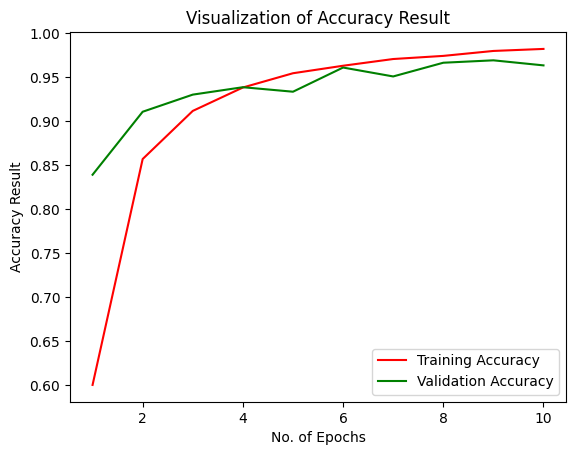

In [123]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel("Accuracy Result")
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

### Some other metrics for model evaluation


In [124]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [125]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [127]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 19s 34ms/step


(array([[9.9998438e-01, 1.4071072e-06, 9.4847530e-10, ..., 1.9654120e-13,
         3.5440731e-13, 9.2340198e-11],
        [9.9955612e-01, 3.8257014e-04, 2.6688947e-09, ..., 2.0943408e-12,
         2.0286129e-11, 1.5071872e-10],
        [1.0000000e+00, 1.1850922e-08, 4.9939458e-12, ..., 2.9488058e-18,
         1.2086524e-16, 2.0070393e-12],
        ...,
        [1.7090659e-07, 5.6067956e-10, 1.7761458e-07, ..., 1.5624204e-08,
         6.5509587e-10, 9.9993587e-01],
        [6.6105303e-09, 6.4477508e-12, 5.0627684e-09, ..., 3.2021033e-10,
         1.7377377e-11, 9.9999845e-01],
        [1.5774289e-13, 1.2319751e-14, 1.3376250e-11, ..., 9.3352687e-14,
         1.0472647e-13, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [131]:
predicted_categories = tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [134]:
true_categories = tf.concat([y for x,y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [140]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [148]:
from sklearn.metrics import classification_report,confusion_matrix

In [147]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.97      0.96       504
                                 Apple___Black_rot       0.98      0.99      0.98       497
                          Apple___Cedar_apple_rust       1.00      0.95      0.98       440
                                   Apple___healthy       0.98      0.93      0.96       502
                               Blueberry___healthy       0.92      0.99      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.96      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.95      0.98      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.93      0.92       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.94      0.

In [153]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[490,   0,   0, ...,   0,   0,   0],
       [  4, 490,   0, ...,   0,   0,   0],
       [  1,   0, 420, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ..., 486,   0,   0],
       [  0,   0,   0, ...,   0, 444,   0],
       [  0,   0,   0, ...,   0,   0, 472]], dtype=int64)

### Confusion Matrix Visualization



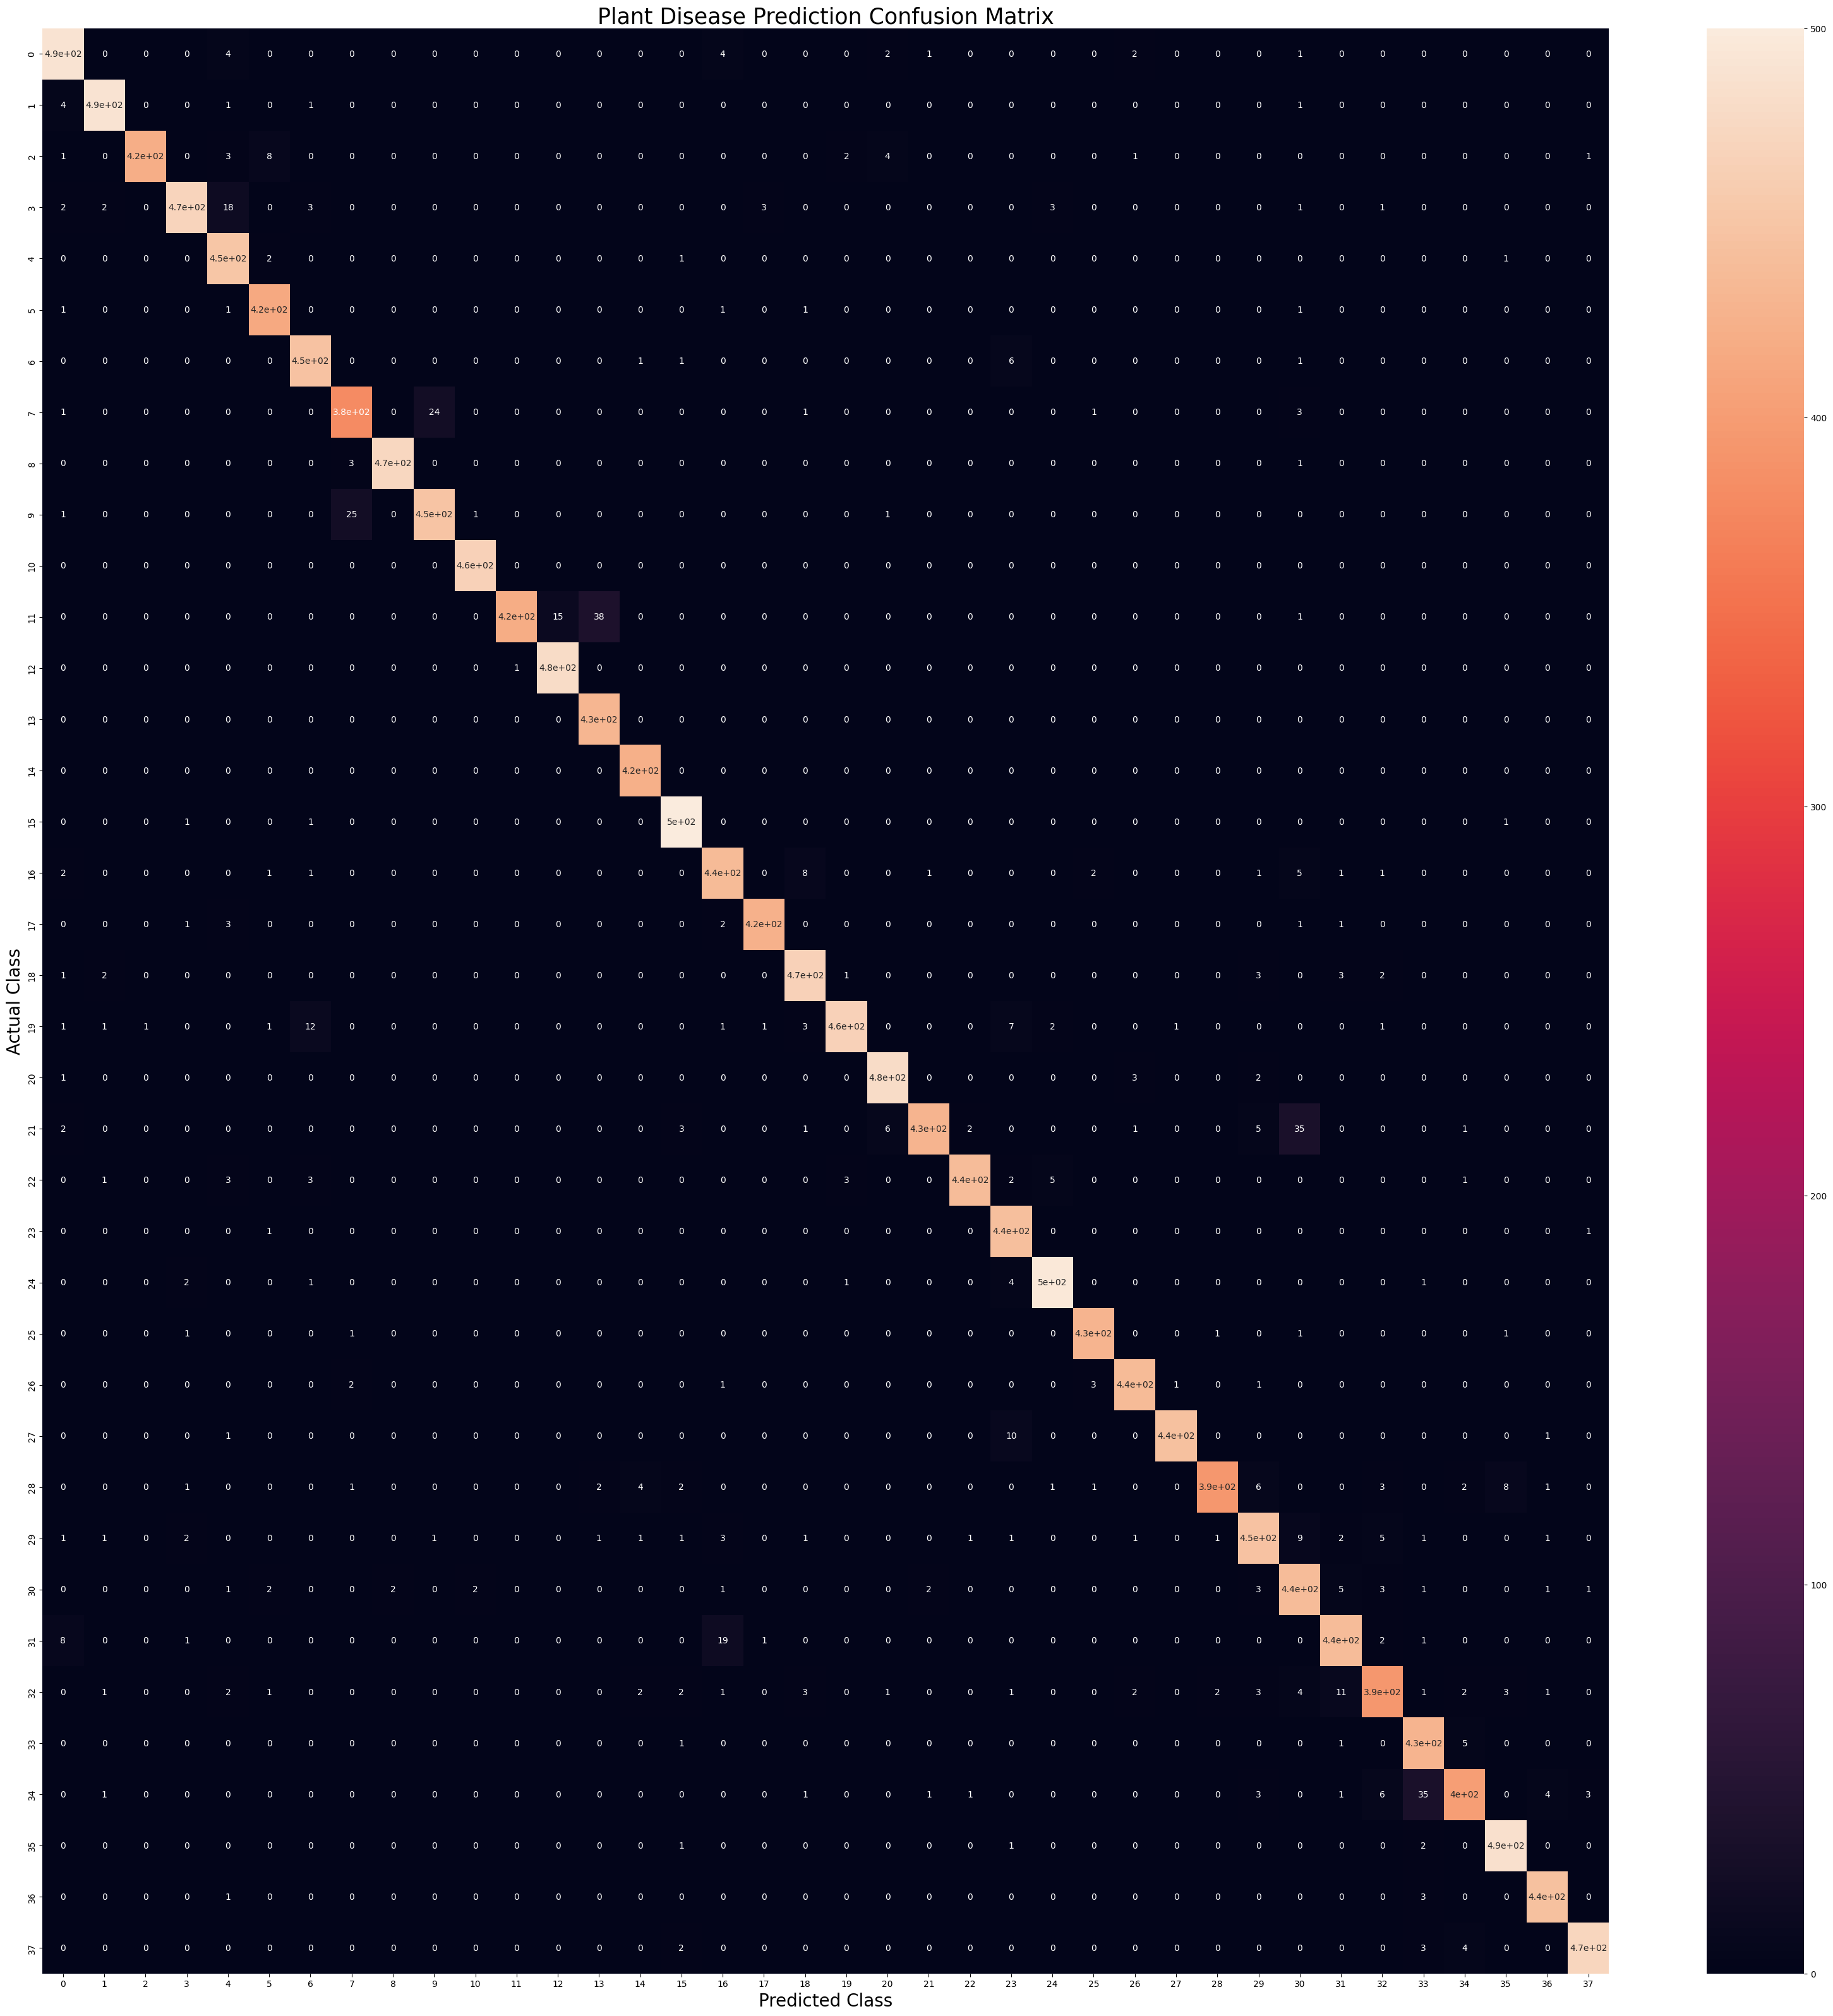

In [170]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20 )
plt.title("Plant Disease Prediction Confusion Matrix", fontsize=25)
plt.show()